In [523]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objects as go

In [524]:
# A dataset of acceleration information of people playing basketball.
# The files contain the following 5 actions:
# dribble the ball
# hold the ball
# pass the ball
# pick up the ball
# shoot the ball


dribble_df = pd.read_csv("D_dribble1.txt", skiprows=3)
dribble_df.columns = dribble_df.columns.str.strip()
dribble_x = dribble_df["X (m/s2)"].values
dribble_y = dribble_df["Y (m/s2)"].values
dribble_z = dribble_df["Z (m/s2)"].values

hold_df = pd.read_csv("D_hold1.txt", skiprows=3)
hold_df.columns = hold_df.columns.str.strip()
hold_x = hold_df["X (m/s2)"].values
hold_y = hold_df["Y (m/s2)"].values
hold_z = hold_df["Z (m/s2)"].values

pass_df = pd.read_csv("D_pass1.txt", skiprows=3)
pass_df.columns = pass_df.columns.str.strip()
pass_x = pass_df["X (m/s2)"].values
pass_y = pass_df["Y (m/s2)"].values
pass_z = pass_df["Z (m/s2)"].values

pickup_df = pd.read_csv("D_pickup1.txt", skiprows=3)
pickup_df.columns = pickup_df.columns.str.strip()
pickup_x = pickup_df["X (m/s2)"].values
pickup_y = pickup_df["Y (m/s2)"].values
pickup_z = pickup_df["Z (m/s2)"].values

shoot_df = pd.read_csv("D_shoot1.txt", skiprows=3)
shoot_df.columns = shoot_df.columns.str.strip()
shoot_x = shoot_df["X (m/s2)"].values
shoot_y = shoot_df["Y (m/s2)"].values
shoot_z = shoot_df["Z (m/s2)"].values


In [525]:
dribble_df.head(5)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg)
0,0.000000,3.428497,9.112331,-2.047042,9.948847,101.873802,69.381287
1,0.009703,3.447650,9.285912,-2.331953,10.176072,103.247643,69.631172
2,0.019734,3.506308,9.212888,-2.244564,10.109875,102.827530,69.163811
3,0.029704,3.703830,8.972271,-1.990779,9.908744,101.590256,67.568748
4,0.039805,3.902549,8.799889,-1.545457,9.749685,99.120628,66.083809


In [526]:
hold_df.head(5)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg)
0,0.000000,5.066131,8.058883,-1.243788,9.599910,97.444305,57.844917
1,0.010050,5.237316,8.115147,-1.338359,9.750708,97.889183,57.162796
2,0.019919,5.434838,8.097190,-0.958878,9.799050,95.615616,56.130470
3,0.030061,5.658696,8.000225,-0.469264,9.810435,92.741684,54.727577
4,0.039893,5.702989,7.717709,0.071826,9.596472,89.571159,53.537510


In [527]:
pass_df.head(5)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg)
0,0.000000,4.277241,8.761581,-1.459266,9.858477,98.512283,63.979229
1,0.009352,4.463989,8.748413,-1.661576,9.961062,99.602226,62.966473
2,0.019550,4.513070,8.603564,-1.273715,9.798544,97.469032,62.320377
3,0.029380,4.727351,8.410830,-0.636858,9.669308,93.776451,60.661610
4,0.039503,5.036203,8.254010,0.050278,9.669258,89.702072,58.610451


In [528]:
pickup_df.head(5)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg)
0,0.000000,-0.374693,8.285135,3.974375,9.196712,64.395813,92.589417
1,0.009907,-0.092177,8.532935,3.521871,9.231633,67.573357,90.618912
2,0.019880,0.080206,8.257602,4.651934,9.478127,60.606346,89.443504
3,0.029844,-0.022745,7.977480,5.479131,9.677891,55.517864,90.163361
4,0.039850,0.090980,7.953538,5.829881,9.861773,53.760662,89.344627


In [529]:
shoot_df.head(5)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg)
0,0.000000,4.927267,8.297106,-1.447295,9.757796,98.529694,59.295887
1,0.010069,4.859032,8.064868,-0.981623,9.466566,95.951904,58.931301
2,0.020059,5.304354,8.016984,-0.294487,9.617428,91.754677,56.509800
3,0.030132,5.923255,8.039729,0.499191,9.998569,87.138245,53.619141
4,0.040165,6.259640,7.984663,1.295263,10.228178,82.724716,51.905045


Below shows the information regarding where the ball travels.
It uses matplotlib, which is harder to analyze.

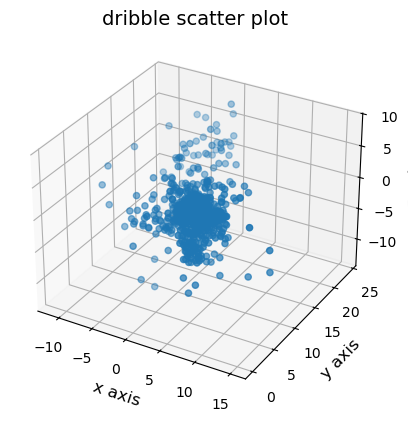

In [531]:
dribble_fig = plt.figure()
dribble_ax = dribble_fig.add_subplot(111, projection='3d')

dribble_ax.scatter3D(dribble_x, dribble_y, dribble_z)

dribble_ax.set_xlabel("x axis", fontsize=12)
dribble_ax.set_ylabel("y axis", fontsize=12)
dribble_ax.set_zlabel("z axis", fontsize=12)
dribble_ax.set_title("dribble scatter plot", fontsize=14)

plt.savefig("jack_dribble_plot.png")

plt.show()

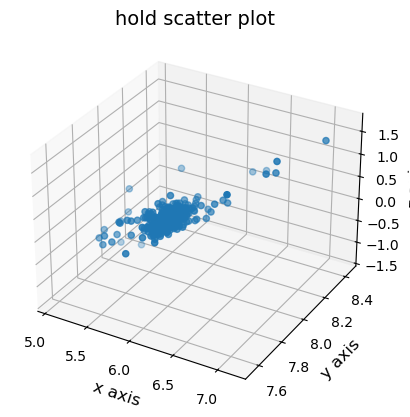

In [532]:
hold_fig = plt.figure()
hold_ax = hold_fig.add_subplot(111, projection='3d')

hold_ax.scatter3D(hold_x, hold_y, hold_z)

hold_ax.set_xlabel("x axis", fontsize=12)
hold_ax.set_ylabel("y axis", fontsize=12)
hold_ax.set_zlabel("z axis", fontsize=12)
hold_ax.set_title("hold scatter plot", fontsize=14)

plt.savefig("jack_hold_plot.png")

plt.show()

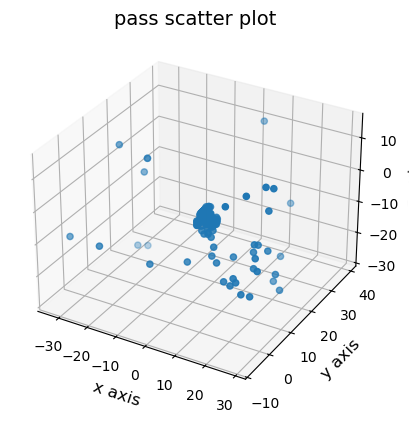

In [533]:
pass_fig = plt.figure()
pass_ax = pass_fig.add_subplot(111, projection='3d')

pass_ax.scatter3D(pass_x, pass_y, pass_z)

pass_ax.set_xlabel("x axis", fontsize=12)
pass_ax.set_ylabel("y axis", fontsize=12)
pass_ax.set_zlabel("z axis", fontsize=12)
pass_ax.set_title("pass scatter plot", fontsize=14)

plt.savefig("jack_pass_plot.png")

plt.show()

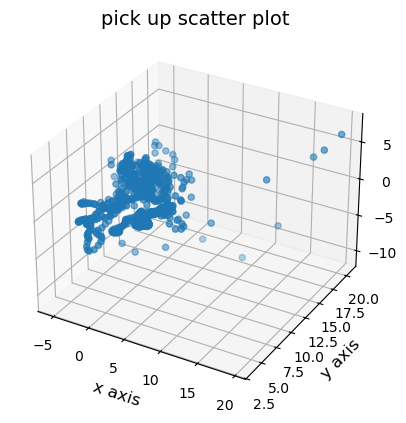

In [534]:
pickup_fig = plt.figure()
pickup_ax = pickup_fig.add_subplot(111, projection='3d')

pickup_ax.scatter3D(pickup_x, pickup_y, pickup_z)

pickup_ax.set_xlabel("x axis", fontsize=12)
pickup_ax.set_ylabel("y axis", fontsize=12)
pickup_ax.set_zlabel("z axis", fontsize=12)
pickup_ax.set_title("pick up scatter plot", fontsize=14)

plt.savefig("jack_pickup_plot.png")

plt.show()

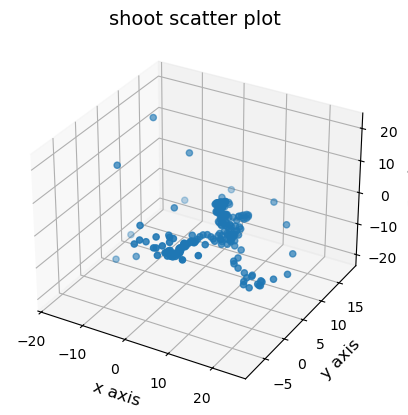

In [535]:
shoot_fig = plt.figure()
shoot_ax = shoot_fig.add_subplot(111, projection='3d')

shoot_ax.scatter3D(shoot_x, shoot_y, shoot_z)

shoot_ax.set_xlabel("x axis", fontsize=12)
shoot_ax.set_ylabel("y axis", fontsize=12)
shoot_ax.set_zlabel("z axis", fontsize=12)
shoot_ax.set_title("shoot scatter plot", fontsize=14)

plt.savefig("jack_shoot_plot.png")

plt.show()

Below shows the prior information, but it uses plotly instead.

In [537]:
dribble_plotly = go.Figure()

dribble_plotly.add_trace(go.Scatter3d(
    x=dribble_x,
    y=dribble_y,
    z=dribble_z,
    mode="markers",
    marker=dict(
        size=8,
        color="blue",
        opacity=0.8
    )
))

dribble_plotly.update_layout(
    title="plotly dribble scatter plot",
    scene=dict(
        xaxis_title="x axis",
        yaxis_title="y axis",
        zaxis_title="z axis",
    ),
    width=700,
    height=700,
)

dribble_plotly.write_html("jack_dribble_plot.html")

dribble_plotly.show()

In [538]:
hold_plotly = go.Figure()

hold_plotly.add_trace(go.Scatter3d(
    x=hold_x,
    y=hold_y,
    z=hold_z,
    mode="markers",
    marker=dict(
        size=8,
        color="blue",
        opacity=0.8
    )
))

hold_plotly.update_layout(
    title="plotly hold scatter plot",
    scene=dict(
        xaxis_title="x axis",
        yaxis_title="y axis",
        zaxis_title="z axis",
    ),
    width=700,
    height=700,
)

dribble_plotly.write_html("jack_hold_plot.html")

hold_plotly.show()

In [539]:
pass_plotly = go.Figure()

pass_plotly.add_trace(go.Scatter3d(
    x=pass_x,
    y=pass_y,
    z=pass_z,
    mode="markers",
    marker=dict(
        size=8,
        color="blue",
        opacity=0.8
    )
))

pass_plotly.update_layout(
    title="plotly pass scatter plot",
    scene=dict(
        xaxis_title="x axis",
        yaxis_title="y axis",
        zaxis_title="z axis",
    ),
    width=700,
    height=700,
)

dribble_plotly.write_html("jack_pass_plot.html")

pass_plotly.show()

In [540]:
pickup_plotly = go.Figure()

pickup_plotly.add_trace(go.Scatter3d(
    x=pickup_x,
    y=pickup_y,
    z=pickup_z,
    mode="markers",
    marker=dict(
        size=8,
        color="blue",
        opacity=0.8
    )
))

pickup_plotly.update_layout(
    title="plotly pick up scatter plot",
    scene=dict(
        xaxis_title="x axis",
        yaxis_title="y axis",
        zaxis_title="z axis",
    ),
    width=700,
    height=700,
)

dribble_plotly.write_html("jack_pickup_plot.html")

pickup_plotly.show()

In [541]:
shoot_plotly = go.Figure()

shoot_plotly.add_trace(go.Scatter3d(
    x=shoot_x,
    y=shoot_y,
    z=shoot_z,
    mode="markers",
    marker=dict(
        size=8,
        color="blue",
        opacity=0.8
    )
))

shoot_plotly.update_layout(
    title="plotly shoot scatter plot",
    scene=dict(
        xaxis_title="x axis",
        yaxis_title="y axis",
        zaxis_title="z axis",
    ),
    width=700,
    height=700,
)

dribble_plotly.write_html("jack_shoot_plot.html")

shoot_plotly.show()

- In the dribble plot, the acceleration is clumped together, and the z axis acceleration moves between positive and negative a lot.
- In the hold plot, most of the z axis acceleration is near zero. The horizontal acceleration doesn't change much, maybe because the ball holder was traveling.
- In the pass plot, there are points which show a lot of horizontal acceleration. There's also some vertical acceleration, maybe due to the ball being thrown up or bounced on certain passes.
- In the pick up plot, vertical acceleration mostly stays close to 0. There's a lot of horizontal acceleration, maybe because the ball holder is still moving the ball around to keep it from getting taken. It's mostly on the y axis, which could be due to the direction the ball holder is facing.
- In the shoot plot, there's a sudden large amount of vertical acceleration, probably from the ball being thrown up and then falling to the ground.